Saved: two_layer_nn_100.png


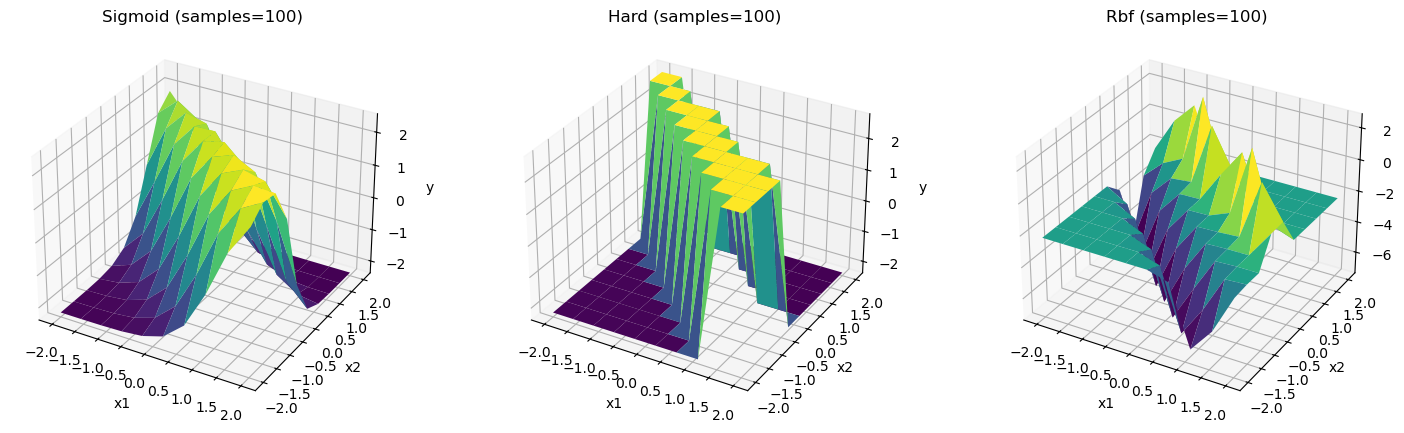

Saved: two_layer_nn_5000.png


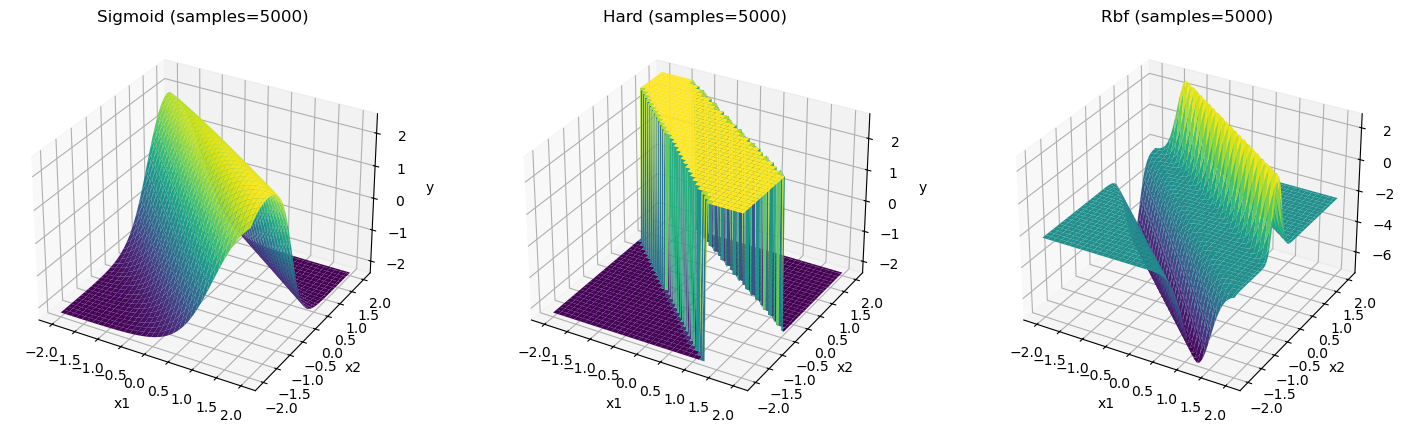

Saved: two_layer_nn_10000.png


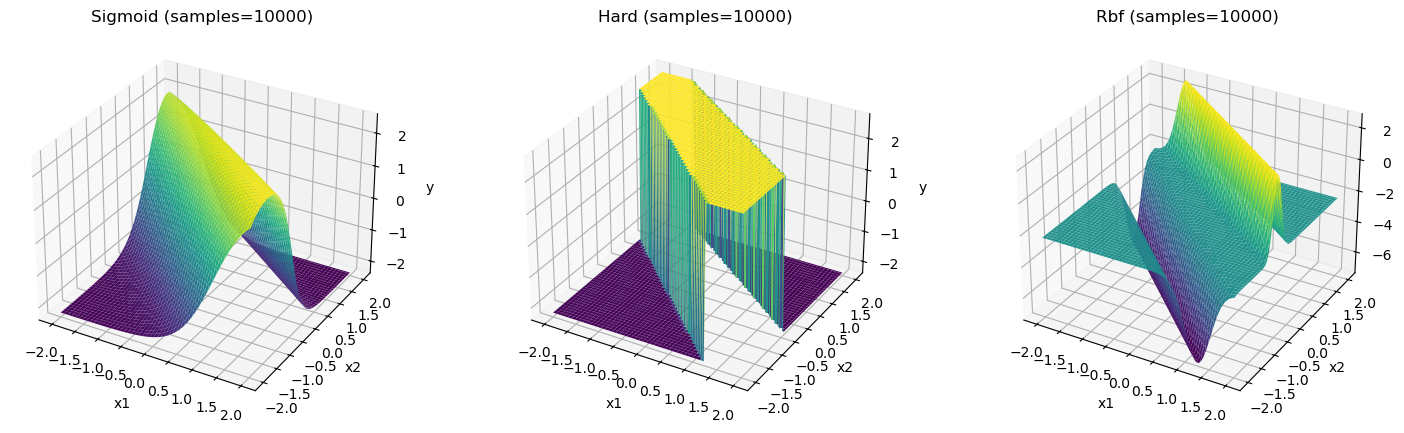

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------------------
# Activation functions
# ----------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hard_limit(z):
    return np.where(z >= 0, 1, 0)

def rbf(z):
    return np.exp(-z**2)

# ----------------------------------------
# Two-layer Neural Network
# ----------------------------------------
def two_layer_nn(x1, x2, activation="sigmoid"):
    # Weight matrices
    V = np.array([[-2.69, -2.80],
                  [-3.39, -4.56]])  # shape (2,2)
    b_v = np.array([-2.21, 4.76])    # bias for hidden layer

    W = np.array([-4.91, 4.95])      # output weights
    b_w = -2.28                      # output bias

    # Stack inputs
    X = np.array([x1, x2])  # shape (2, N)

    # Hidden layer pre-activation
    z_hidden = V @ X + b_v.reshape(-1,1)

    # Apply activation
    if activation == "sigmoid":
        h = sigmoid(z_hidden)
    elif activation == "hard":
        h = hard_limit(z_hidden)
    elif activation == "rbf":
        h = rbf(z_hidden)
    else:
        raise ValueError("Unknown activation function")

    # Output layer
    y = W @ h + b_w
    return y.reshape(x1.shape)

# ----------------------------------------
# Plotting function
# ----------------------------------------
def plot_all_activations(sample_size):
    activations = ["sigmoid", "hard", "rbf"]
    fig = plt.figure(figsize=(18, 5))

    # Create grid
    x1 = np.linspace(-2, 2, int(np.sqrt(sample_size)))
    x2 = np.linspace(-2, 2, int(np.sqrt(sample_size)))
    X1, X2 = np.meshgrid(x1, x2)

    for i, activation in enumerate(activations, 1):
        Y = two_layer_nn(X1.flatten(), X2.flatten(), activation)
        Y = Y.reshape(X1.shape)

        ax = fig.add_subplot(1, 3, i, projection="3d")
        surf = ax.plot_surface(X1, X2, Y, cmap="viridis")
        ax.set_title(f"{activation.capitalize()} (samples={sample_size})")
        ax.set_xlabel("x1")
        ax.set_ylabel("x2")
        ax.set_zlabel("y")

    # Save figure
    filename = f"two_layer_nn_{sample_size}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Saved: {filename}")
    plt.show()

# ----------------------------------------
# Run for all sample sizes
# ----------------------------------------
for size in [100, 5000, 10000]:
    plot_all_activations(size)
